In [85]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [86]:
#loading the iris matrix and the dataset

X_dataset = pd.read_csv('data_old/iris_modif.data', names = ['data1', 'data2', 'data3', 'data4', 'type'])
y = pd.read_csv('data_old/y.data')

#cehcking the iris matrix

X_dataset.tail()

,data1,data2,data3,data4,type
95,6.7,3.0,5.2,2.3,Iris-virginica
96,6.3,2.5,5.0,1.9,Iris-virginica
97,6.5,3.0,5.2,2.0,Iris-virginica
98,6.2,3.4,5.4,2.3,Iris-virginica
99,5.9,3.0,5.1,1.8,Iris-virginica


In [87]:
#transforming the x values

X = np.array([np.array(X_dataset['data1']), np.array(X_dataset['data2']), np.array(X_dataset['data3']), np.array(X_dataset['data4'])]).T

#transforming the y values

y_temp = np.array(X_dataset['type'])

y = []

for i in range(0,len(y_temp)):
    if y_temp[i] == 'Iris-setosa':
        y.append(-1)
    elif y_temp[i] == 'Iris-virginica':
        y.append(1)
        
#creating test and train datasets

X_train = X[::2]
X_test = X[1::2]

y_train = y[::2]
y_test = y[1::2]

In [88]:
#defining the prediction function

def predict(X_vector, m_w):
    
    probability = m_w[0]
    
    for i in range(0, len(X_vector)):
        probability += X_vector[i]*m_w[i+1]
        
    if probability > 0:
        return 1
    else:
        return -1

In [92]:
#defining the fit function which modifies the weights

def fit(X, y, epochs, eta):
    
    m_w = [0, 0, 0, 0, 0]
    
    #iterating through each epoch
    for i in range(0,epochs):
        for j in range(0,len(X)):
            
            update = eta * (y[j] - predict(X[j], m_w))
            
            for w in range(1,len(m_w)):
                m_w[w] += update * X[j][w-1]
            
            m_w[0] += update
            
    return m_w

In [93]:
#calling the prediction function and plotting the results

def pred_plot(X_test, weights):

    predictions = []

    for i in range(0,len(X_test)):
        predictions.append(predict(X_test[i], weights))
        
    acc = accuracy_score(y_test, predictions)

    print('The accuracy of the prediction is: ', acc)

In [94]:
#setting the variables

epochs = 1
eta = 0.01

#calculating the weights

weights = fit(X_train, y_train, epochs, eta)

#predicting the dataset

pred_plot(X_test, weights)

The accuracy of the prediction is:  0.5


In [8]:
weights

[0.0, -0.045999999999999985, -0.07200000000000001, 0.158, 0.088]

In [9]:
weights = [0, -0.0021, -0.00718, 0.01062, 0.00468,]

In [11]:
#for i in range(0,len(X_test)):
    #print(np.dot(X_test[i], weights[1:]))

In [53]:
a = list(pd.read_csv('data/a.txt', names = ['data1'])['data1'])
b = list(pd.read_csv('data/b.txt', names = ['data1'])['data1'])
c = list(pd.read_csv('data/c.txt', names = ['data1'])['data1'])
d = list(pd.read_csv('data/d.txt', names = ['data1'])['data1'])
y = list(pd.read_csv('data/y.txt', names = ['data1'])['data1'])

a_set = a[0:50]
b_set = b[0:50]
c_set = c[0:50]
d_set = d[0:50]

a_ver = a[50:]
b_ver = b[50:]
c_ver = c[50:]
d_ver = d[50:]

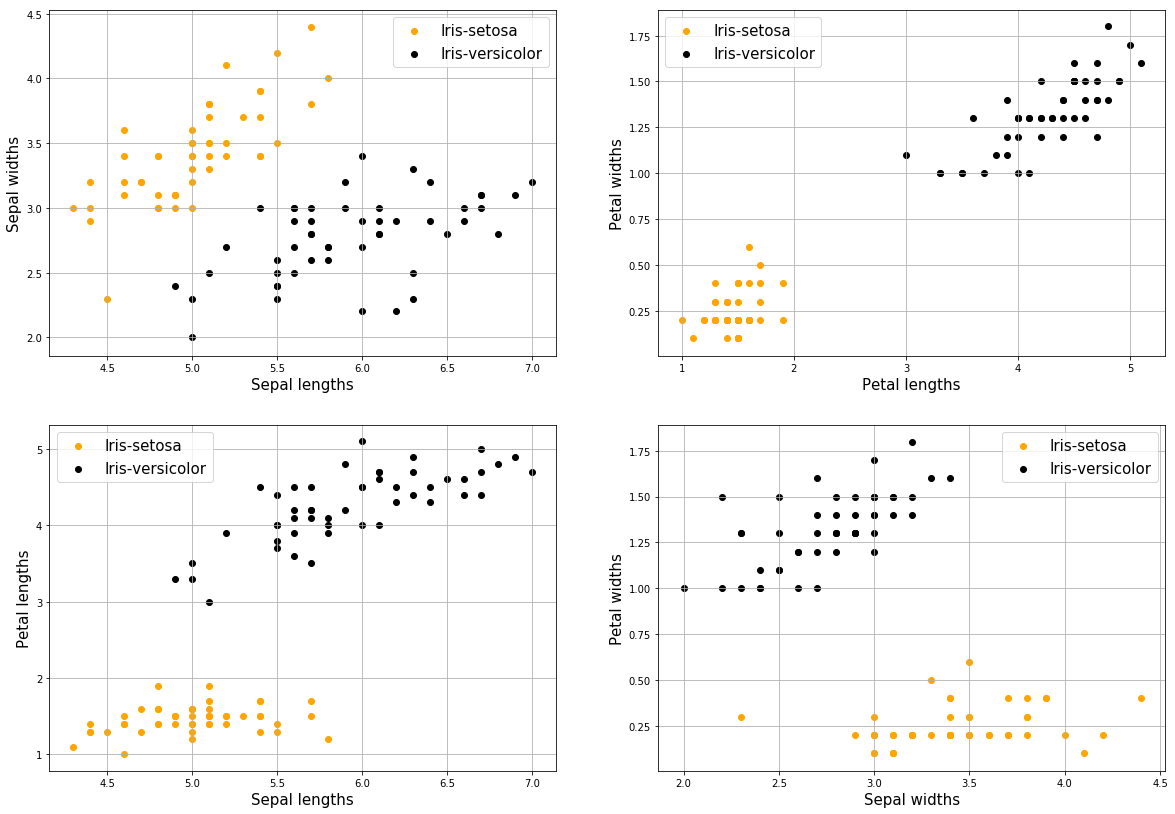

In [81]:
fig, axs = plt.subplots(2, 2, figsize = (20,14))

axs[0, 0].scatter(a_set, b_set, c='orange', label = 'Iris-setosa')
axs[0, 0].scatter(a_ver, b_ver, c='black', label = 'Iris-versicolor')
axs[0, 0].set_xlabel('Sepal lengths', fontsize = 15)
axs[0, 0].set_ylabel('Sepal widths', fontsize = 15)
axs[0, 0].grid()
axs[0, 0].legend(fontsize = 15)

axs[0, 1].scatter(c_set, d_set, c='orange', label = 'Iris-setosa')
axs[0, 1].scatter(c_ver, d_ver, c='black', label = 'Iris-versicolor')
axs[0, 1].set_xlabel('Petal lengths', fontsize = 15)
axs[0, 1].set_ylabel('Petal widths', fontsize = 15)
axs[0, 1].grid()
axs[0, 1].legend(fontsize = 15)

axs[1, 0].scatter(a_set, c_set, c='orange', label = 'Iris-setosa')
axs[1, 0].scatter(a_ver, c_ver, c='black', label = 'Iris-versicolor')
axs[1, 0].set_xlabel('Sepal lengths', fontsize = 15)
axs[1, 0].set_ylabel('Petal lengths', fontsize = 15)
axs[1, 0].grid()
axs[1, 0].legend(fontsize = 15)

axs[1, 1].scatter(b_set, d_set, c='orange', label = 'Iris-setosa')
axs[1, 1].scatter(b_ver, d_ver, c='black', label = 'Iris-versicolor')
axs[1, 1].set_xlabel('Sepal widths', fontsize = 15)
axs[1, 1].set_ylabel('Petal widths', fontsize = 15)
axs[1, 1].grid()
axs[1, 1].legend(fontsize = 15)

plt.savefig('different_iris_prop_scatter.jpg', dpi = 600)

plt.show()